In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
import pandas as pd

In [19]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/Timeseries/Giá nhôm Thế giới 12.2007-12.2022.xlsx'
newpath = '/content/drive/MyDrive/Colab Notebooks/Timeseries/MentalPriceData.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
excel_data = pd.read_excel(newpath)
# Read the values of the file in the dataframe

data = excel_data.loc[:,]
# Print the content
print("The content of the file is:\n", data)

The content of the file is:
      Unnamed: 0       Date    Price      Rate
0             1 2022-12-01  2377.00   +6,31 %
1             2 2022-11-01  2227.00   +3,21 %
2             3 2022-10-01  2155.50   -9,63 %
3             4 2022-09-01  2363.00   -5,67 %
4             5 2022-08-01  2497.00   +0,84 %
..          ...        ...      ...       ...
174         175 2008-04-01  2959.27   -1,55 %
175         176 2008-03-01  3005.29   +7,60 %
176         177 2008-02-01  2776.93  +11,93 %
177         178 2008-01-01  2445.52   +2,61 %
178         179 2007-12-01  2381.69         -

[179 rows x 4 columns]


In [16]:
# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

# Warnings configuration
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')

In [15]:
!pip install skforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.0/217.0 KB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.5/348.5 KB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.4/210.4 KB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 KB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 KB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 KB 16.9 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=48a81d2b3e903b895f26cbfedd37e38a46c1e54882

In [26]:
print(f'Number of rows with missing values: {data.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


In [34]:

#data_train = data[:]
#print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
#print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

#fig, ax=plt.subplots(figsize=(9, 4))
#data_train['Price'].plot(ax=ax, label='Price')
#data_test[''].plot(ax=ax, label='test')
#ax.legend();

Text(0.5, 1.0, 'Price Fluctuation')

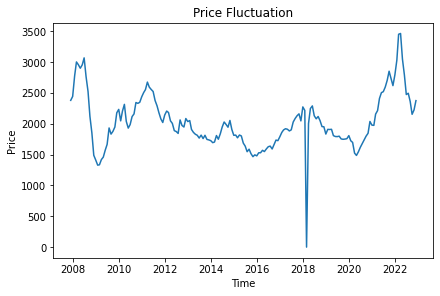

In [37]:
x = data['Date']
y = data['Price']
#print(x)
#print(y)
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(x, y)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.set_title('Price Fluctuation')

In [39]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 6
             )

forecaster.fit(y=data['Price'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Transformer for y: None 
Transformer for exog: None 
Window size: 6 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 178] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2023-01-05 05:26:15 
Last fit date: 2023-01-05 05:26:15 
Skforecast version: 0.6.0 
Python version: 3.8.16 

In [40]:
# Predictions
# ==============================================================================
steps = 12
predictions = forecaster.predict(steps=steps)
predictions.head(5)

179    2298.3003
180    2268.1525
181    2061.9797
182    1974.4294
183    1831.3491
Name: pred, dtype: float64

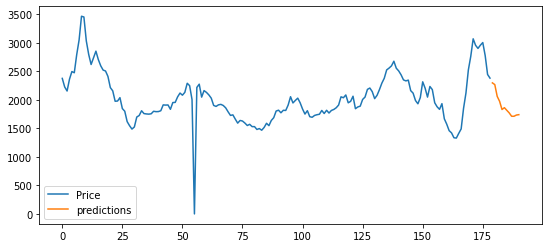

In [41]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data['Price'].plot(ax=ax, label='Price')
predictions.plot(ax=ax, label='predictions')
ax.legend();

# Mục mới